In [2]:
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from preprocess import load_data, next_batch

Using TensorFlow backend.
/Users/faisalg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/faisalg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/faisalg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/faisalg/anaconda3/lib/python3.6/site-packag

In [5]:
import numpy as np
import pandas as pd
data = pd.read_csv('pdb_data_seq.csv')
data.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [9]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


ex = data.macromoleculeType.value_counts()
print(ex)
a = 'Macro Mol Type'
colors = ['SlateGray','Orange','Green','DodgerBlue','DodgerBlue','DodgerBlue','DodgerBlue','DodgerBlue','DodgerBlue',
        'DodgerBlue','DodgerBlue','DodgerBlue','DodgerBlue']
fig = {
      "data": [
        {
          "values":ex.values,
          "labels":ex.index,
          "text":a,
          "textposition":"inside",
          #"domain": {"x": [0, .33]},
          "textfont": {'size':12,'color':'white'},  
          "name": a,
          "hoverinfo":"label+percent+name",
          "hole": .4,
          'marker':{'colors':colors
                   },
          "type": "pie"
        }],
    "layout": {
            "title":"Macro Molecule type Distribution",
            "annotations": [
                {
                    "font": {
                        "size": 20
                    },
                    "showarrow": False,
                    "text": a,
                    "x": 0.50,
                    "y": 0.5
                }]
            }
        }
iplot(fig)                            

AttributeError: 'DataFrame' object has no attribute 'macromoleculeType'

In [6]:
data = data.dropna()
print(data.shape)
#print(data.isnull().sum())
data = data.values

(432474, 5)


In [ ]:
import plotly.offline as py
print ('There are more than 10 macro molecules used in this dataset but PROTEIN is widely used than the others')

ex = data.macromoleculeType.value_counts()
print(ex)
a = 'Macro Mol Type'
colors = ['SlateGray','Orange','Green','DodgerBlue','DodgerBlue','DodgerBlue','DodgerBlue','DodgerBlue','DodgerBlue',
        'DodgerBlue','DodgerBlue','DodgerBlue','DodgerBlue']
fig = {
      "data": [
        {
          "values":ex.values,
          "labels":ex.index,
          "text":a,
          "textposition":"inside",
          #"domain": {"x": [0, .33]},
          "textfont": {'size':12,'color':'white'},  
          "name": a,
          "hoverinfo":"label+percent+name",
          "hole": .4,
          'marker':{'colors':colors
                   },
          "type": "pie"
        }],
    "layout": {
            "title":"Macro Molecule type Distribution",
            "annotations": [
                {
                    "font": {
                        "size": 20
                    },
                    "showarrow": False,
                    "text": a,
                    "x": 0.50,
                    "y": 0.5
                }]
            }
        }
py.plot(fig)                            

In [7]:
new_data = []
for i in range(len(data)):
    if data[i][4] == '':
        continue
    elif data[i][4] == 'DNA' or data[i][4]== 'Protein'or data[i][4] == 'RNA':
        new_data.append([data[i][2],data[i][4]])
    else:
        new_data.append([data[i][2],'Hybrid'])
        
new_data = np.array(new_data)
new_data.shape



(432474, 2)

In [8]:
data = pd.DataFrame(new_data, columns=['sequence', 'type'])
data.head()

,sequence,type
0,CCGGCGCCGG,Hybrid
1,CCGGCGCCGG,Hybrid
2,CGCGAATTCGCG,DNA
3,CGCGAATTCGCG,DNA
4,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,Protein


In [128]:
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

# maximum length of sequence, everything afterwards is discarded!
max_length = 512
seqs = data.sequence.values
#create and fit tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(seqs)
#represent input data as word rank number sequences
X = tokenizer.texts_to_sequences(seqs)
X = sequence.pad_sequences(X, maxlen=max_length)

In [129]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(data.type)

In [137]:

# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 512, 8)            208       
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 512, 32)           800       
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 256, 32)           0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 256, 32)           3104      
_________________________________________________________________
lstm_52 (LSTM)               (None, 256, 100)          53200     
_________________________________________________________________
lstm_53 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 404       
Total para

In [ ]:
%matplotlib inline
import matplotlib as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))*100))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))*100))




In [95]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding

embedding_dim = 8

# create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=128)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 20, 8)             184       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 20, 64)            3136      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 10, 32)            6176      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 5, 32)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               20608     
__________

In [106]:
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
embedding_dim = 8

# create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=512)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 20, 8)             184       
_________________________________________________________________
bidirectional_7 (Bidirection (None, 20, 400)           334400    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 400)               961600    
_________________________________________________________________
dense_32 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_33 (Dense)             (None, 4)                 404       
Total params: 1,336,688
Trainable params: 1,336,688
Non-trainable params: 0
_________________________________________________________________
None
Train on 2367 samples, validate on 1014 samples
Epoch 1/10
2367/2367 [==============================] - 23s 10ms/step - loss: 0

In [110]:
%matplotlib inline
import matplotlib as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(x_train)
test_pred = model.predict(x_val)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))*100))
print("test-acc = " + str(accuracy_score(np.argmax(y_val, axis=1), np.argmax(test_pred, axis=1))*100))



train-acc = 91.38149556400506
test-acc = 90.63116370808679


In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(data.type)
import matplotlib.pyplot as plt
%matplotlib inline
# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(np.argmax(y_val, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))

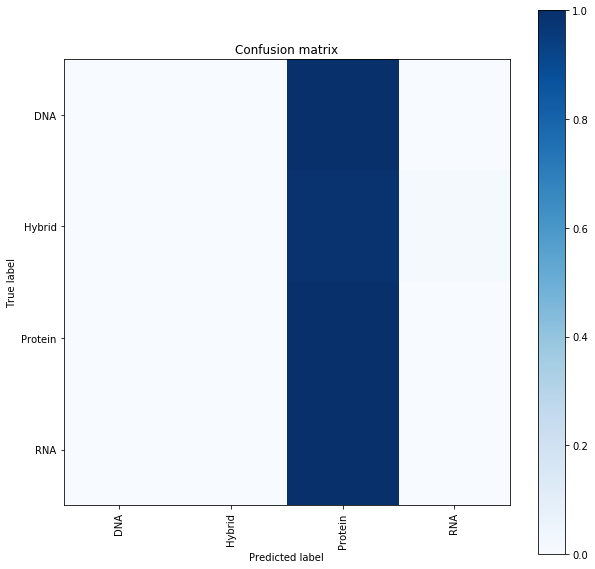

              precision    recall  f1-score   support

         DNA       0.00      0.00      0.00        22
      Hybrid       0.00      0.00      0.00        69
     Protein       0.91      1.00      0.95       919
         RNA       0.00      0.00      0.00         4

   micro avg       0.91      0.91      0.91      1014
   macro avg       0.23      0.25      0.24      1014
weighted avg       0.82      0.91      0.86      1014



/Users/faisalg/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [127]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(data.type)
import matplotlib.pyplot as plt
%matplotlib inline
# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
#for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(np.argmax(y_val, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))

In [ ]:
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=MAX_SEQUENCE_LENGTH))
model.add(GRU(100,return_sequences=True))
